In [10]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np

In [11]:
page = requests.get('https://www.imdb.com/list/ls091520106/')
soup =BeautifulSoup(page.content, 'html.parser')

In [12]:
duration = []
for run in soup.find_all('span', class_='runtime'):
    duration.append(run.get_text())
duration[:] = [t.replace(' min', '') for t in duration]
print(duration)


['142', '175', '202', '152', '96', '195', '201', '154', '178', '139', '122', '178', '142', '148', '124', '179', '136', '133', '146', '207', '127', '130', '116', '118', '121', '130', '169', '125', '189', '110', '133', '169', '106', '88', '119', '116', '150', '87', '137', '112', '109', '155', '87', '151', '106', '165', '130', '181', '102', '89', '112', '155', '117', '115', '113', '147', '125', '137', '149', '165', '117', '146', '88', '98', '110', '95', '134', '120', '116', '164', '229', '132', '137', '122', '105', '106', '178', '149', '170', '165', '131', '81', '99', '160', '161', '126', '153', '99', '102', '149', '128', '108', '119', '116', '115', '136', '136', '102', '122', '68']


In [13]:
rating = []
for rate in soup.find_all('div', class_='ipl-rating-star small'):
    rate.get_text()
    rating.append(rate.get_text().replace('\n', ''))
print(rating)

['9.3', '9.2', '9', '9', '9', '8.9', '8.9', '8.9', '8.8', '8.8', '8.5', '8.8', '8.8', '8.8', '8.7', '8.7', '8.7', '8.7', '8.7', '8.6', '8.6', '8.6', '8.6', '8.6', '8.6', '8.6', '8.6', '8.6', '8.6', '8.5', '8.6', '8.6', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.4', '8.5', '8.5', '8.4', '8.5', '8.4', '8.4', '8.4', '8.4', '8.4', '8.4', '8.4', '8.4', '8.4', '8.4', '8.4', '8.4', '8.4', '8.4', '8.4', '8.4', '8.4', '8.4', '8.4', '8.6', '8.3', '8.3', '8.4', '8.4', '8.3', '8.3', '8.4', '8.4', '8.3', '8.3', '8.3', '8.3', '8.4', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3']


In [5]:
# Get name info:
movie_name = []
for name in soup.find_all('h3', class_="lister-item-header"):  # iterate over every <a> tag
    movie_name.append(name.get_text())

# Replace extra characters to get just names of movies:
movie_name[:] = [s.replace('\n', '') for s in movie_name]
top_movies = []
for movie in movie_name:
    top_movies.append(''.join(c if c.isalpha() or c == ' ' else '' for c in movie))
print(top_movies)
#print(len(top_movies))


# Get descriptions:
description = []
for desc in soup.find_all('p', class_=""):
    description.append(desc.get_text())

description[:] = [t.replace('\n', '').replace('    ', '') for t in description]
description = description[1:]
print(description)
#print(len(description))



['The Shawshank Redemption', 'The Godfather', 'The Godfather Part II', 'The Dark Knight', ' Angry Men', 'Schindlers List', 'The Lord of the Rings The Return of the King', 'Pulp Fiction', 'The Good the Bad and the Ugly', 'Fight Club', 'Joker', 'The Lord of the Rings The Fellowship of the Ring', 'Forrest Gump', 'Inception', 'Star Wars Episode V  The Empire Strikes Back', 'The Lord of the Rings The Two Towers', 'The Matrix', 'One Flew Over the Cuckoos Nest', 'Goodfellas', 'Seven Samurai', 'Seen', 'City of God', 'Life Is Beautiful', 'The Silence of the Lambs', 'Star Wars Episode IV  A New Hope', 'Its a Wonderful Life', 'Saving Private Ryan', 'Spirited Away', 'The Green Mile', 'Léon The Professional', 'HaraKiri', 'Interstellar', 'The Usual Suspects', 'The Lion King', 'American History X', 'Back to the Future', 'The Pianist', 'Modern Times', 'Terminator  Judgment Day', 'The Intouchables', 'Psycho', 'Gladiator', 'City Lights', 'The Departed', 'Whiplash', 'Once Upon a Time in the West', 'The P

In [6]:
release_dates = soup.find_all('span', class_='lister-item-year text-muted unbold')
release_list = []
for i in release_dates:
    date = i.get_text().replace('(', '').replace(')', '')
    release_list.append(date)
print(release_list)

['1994', '1972', '1974', '2008', '1957', '1993', '2003', '1994', '1966', '1999', '2019', '2001', '1994', '2010', '1980', '2002', '1999', '1975', '1990', '1954', '1995', '2002', '1997', '1991', '1977', '1946', '1998', '2001', '1999', '1994', '1962', '2014', '1995', '1994', '1998', '1985', '2002', '1936', '1991', '2011', '1960', '2000', '1931', '2006', '2014', '1968', '2006', '2019', '1942', '1988', '1954', '1988', '1979', '1981', '2000', '1979', '1940', '2006', '2018', '2012', '2018', '1980', '1957', '2008', '1950', '1964', '1997', '2003', '1957', '2012', '1984', '2019', '1986', '1999', 'I 2017', '2016', '1995', '1981', '2009', '2007', '1983', '1995', '1992', '1984', '2016', '1997', '2009', '1931', '2000', '1968', '1958', '2004', '1941', '1987', '2012', '1959', '1971', '2000', '2001', '1921']


In [19]:
all_names = soup.find_all('p', class_='text-muted text-small')[1:]
directors_list_dirty = []
for i in all_names:
    all_directors_names = i.find('a')
    directors_list_dirty.append(all_directors_names)

directors_list = []
for i in directors_list_dirty[::3]:
    director_name = i.get_text()
    directors_list.append(director_name)
print(directors_list)

['Frank Darabont', 'Francis Ford Coppola', 'Francis Ford Coppola', 'Christopher Nolan', 'Sidney Lumet', 'Steven Spielberg', 'Peter Jackson', 'Quentin Tarantino', 'Sergio Leone', 'David Fincher', 'Todd Phillips', 'Peter Jackson', 'Robert Zemeckis', 'Christopher Nolan', 'Irvin Kershner', 'Peter Jackson', 'Lana Wachowski', 'Milos Forman', 'Martin Scorsese', 'Akira Kurosawa', 'David Fincher', 'Fernando Meirelles', 'Roberto Benigni', 'Jonathan Demme', 'George Lucas', 'Frank Capra', 'Steven Spielberg', 'Hayao Miyazaki', 'Frank Darabont', 'Luc Besson', 'Masaki Kobayashi', 'Christopher Nolan', 'Bryan Singer', 'Roger Allers', 'Tony Kaye', 'Robert Zemeckis', 'Roman Polanski', 'Charles Chaplin', 'James Cameron', 'Olivier Nakache', 'Alfred Hitchcock', 'Ridley Scott', 'Charles Chaplin', 'Martin Scorsese', 'Damien Chazelle', 'Sergio Leone', 'Christopher Nolan', 'Anthony Russo', 'Michael Curtiz', 'Isao Takahata', 'Alfred Hitchcock', 'Giuseppe Tornatore', 'Ridley Scott', 'Steven Spielberg', 'Christoph

In [21]:
# Get Genre Names
all_genre =[]
genre = soup.find_all("span",{"class":"genre"})
for typ in genre:
    all_genre.append(typ.get_text().strip())
print(all_genre)

# Get Star names
all_p = soup.find_all('p',class_='text-muted text-small')
all_stars_m = []
for a in all_p:
     stars = a.get_text().strip().replace("\n",'')
     all_stars_m.append(stars)
     #print(stars)
#print(all_stars)

all_stars =[]
for i in all_stars_m:
     if "Stars" in i:
          start = i.find('Stars:') +6
          end = len(i)
          star = i[start:end]
          all_stars.append(star)
print(all_stars)

['Drama', 'Crime, Drama', 'Crime, Drama', 'Action, Crime, Drama', 'Crime, Drama', 'Biography, Drama, History', 'Action, Adventure, Drama', 'Crime, Drama', 'Western', 'Drama', 'Crime, Drama, Thriller', 'Action, Adventure, Drama', 'Drama, Romance', 'Action, Adventure, Sci-Fi', 'Action, Adventure, Fantasy', 'Action, Adventure, Drama', 'Action, Sci-Fi', 'Drama', 'Biography, Crime, Drama', 'Action, Adventure, Drama', 'Crime, Drama, Mystery', 'Crime, Drama', 'Comedy, Drama, Romance', 'Crime, Drama, Thriller', 'Action, Adventure, Fantasy', 'Drama, Family, Fantasy', 'Drama, War', 'Animation, Adventure, Family', 'Crime, Drama, Fantasy', 'Action, Crime, Drama', 'Action, Drama, Mystery', 'Adventure, Drama, Sci-Fi', 'Crime, Mystery, Thriller', 'Animation, Adventure, Drama', 'Drama', 'Adventure, Comedy, Sci-Fi', 'Biography, Drama, Music', 'Comedy, Drama, Family', 'Action, Sci-Fi', 'Biography, Comedy, Drama', 'Horror, Mystery, Thriller', 'Action, Adventure, Drama', 'Comedy, Drama, Romance', 'Crime, 

In [29]:
movie_links = soup.find_all('h3', class_='lister-item-header')
tags_list = []
for i in movie_links: 
    href = i.findChildren('a')
    tags_list.append(href)
#print(tags_list)
links1 = []
for tag in tags_list:
    for i in tag:
        links1.append(i.get('href'))

final_link_list1 = []
for i in links1:
    i = "https://www.imdb.com" + i + 'locations?ref_=tt_ql_dt_5'
    final_link_list1.append(i)
print(final_link_list1)

filming_dates = []
for link in final_link_list1:
    new_page = requests.get(link)
    #print(new_page)
    new_soup = BeautifulSoup(new_page.content, 'html.parser')
    try:
        tecspec_links = new_soup.find('section', {'id': 'filming_dates'}).findChildren('li')
    except:
        tecspec_links = 'No filming dates available'
    for i in tecspec_links:
        try:
            dates = i.get_text()
        except:
            dates = 'No filming dates available'
        filming_dates.append(dates.replace('\n', '').replace('                    ', '').replace('    ', ''))
#print(filming_dates)
filming_dates = filming_dates[:100]
print(filming_dates)
#print(len(filming_dates))

['https://www.imdb.com/title/tt0111161/locations?ref_=tt_ql_dt_5', 'https://www.imdb.com/title/tt0068646/locations?ref_=tt_ql_dt_5', 'https://www.imdb.com/title/tt0071562/locations?ref_=tt_ql_dt_5', 'https://www.imdb.com/title/tt0468569/locations?ref_=tt_ql_dt_5', 'https://www.imdb.com/title/tt0050083/locations?ref_=tt_ql_dt_5', 'https://www.imdb.com/title/tt0108052/locations?ref_=tt_ql_dt_5', 'https://www.imdb.com/title/tt0167260/locations?ref_=tt_ql_dt_5', 'https://www.imdb.com/title/tt0110912/locations?ref_=tt_ql_dt_5', 'https://www.imdb.com/title/tt0060196/locations?ref_=tt_ql_dt_5', 'https://www.imdb.com/title/tt0137523/locations?ref_=tt_ql_dt_5', 'https://www.imdb.com/title/tt7286456/locations?ref_=tt_ql_dt_5', 'https://www.imdb.com/title/tt0120737/locations?ref_=tt_ql_dt_5', 'https://www.imdb.com/title/tt0109830/locations?ref_=tt_ql_dt_5', 'https://www.imdb.com/title/tt1375666/locations?ref_=tt_ql_dt_5', 'https://www.imdb.com/title/tt0080684/locations?ref_=tt_ql_dt_5', 'https://

In [ ]:
# locate movie link & open it
# locate link to Filming & Production
# Retrieve information about filming date : li class="ipl-zebra-list__item"

In [25]:
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', 1)

data = {'Description': description,
        'Release Date': release_list,
        'Director Name': directors_list,
        'Rating': rating,
        'Duration': duration,
        'Genre': all_genre,
        'Stars': all_stars,
        'Filming Dates': filming_dates
}
labels = top_movies

imdb = pd.DataFrame(data, index= labels)  # Name change from DF to imdb 
imdb['Rating'] = pd.to_numeric(imdb['Rating'])
imdb['Duration'] = pd.to_numeric(imdb['Duration'])

imdb1 = imdb
imdb

,Description,Release Date,Director Name,Rating,Duration,Genre,Stars,Filming Dates
The Shawshank Redemption,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",1994,Frank Darabont,9.3,142,Drama,"Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler",16 June 1993 - 10 September 1993
The Godfather,The aging patriarch of an organized crime dynasty transfers control of his clandestine empire to his reluctant son.,1972,Francis Ford Coppola,9.2,175,"Crime, Drama","Marlon Brando, Al Pacino, James Caan, Diane Keaton",29 March 1971 - 6 August 1971
The Godfather Part II,"The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.",1974,Francis Ford Coppola,9.0,202,"Crime, Drama","Al Pacino, Robert De Niro, Robert Duvall, Diane Keaton",1 October 1973 - 19 June 1974
The Dark Knight,"When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.",2008,Christopher Nolan,9.0,152,"Action, Crime, Drama","Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine",18 April 2007 - 11 November 2007
Angry Men,A jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence.,1957,Sidney Lumet,9.0,96,"Crime, Drama","Henry Fonda, Lee J. Cobb, Martin Balsam, John Fiedler",June 1956 - July 1956
...,...,...,...,...,...,...,...,...
North by Northwest,A New York City advertising executive goes on the run after being mistaken for a government agent by a group of foreign spies.,1959,Alfred Hitchcock,8.3,136,"Adventure, Mystery, Thriller","Cary Grant, Eva Marie Saint, James Mason, Jessie Royce Landis",No filming dates available
A Clockwork Orange,"In the future, a sadistic gang leader is imprisoned and volunteers for a conduct-aversion experiment, but it doesn't go as planned.",1971,Stanley Kubrick,8.3,136,"Crime, Drama, Sci-Fi","Malcolm McDowell, Patrick Magee, Michael Bates, Warren Clarke",No filming dates available
Snatch,"Unscrupulous boxing promoters, violent bookmakers, a Russian gangster, incompetent amateur robbers and supposedly Jewish jewelers fight to track down a priceless stolen diamond.",2000,Guy Ritchie,8.3,102,"Comedy, Crime","Jason Statham, Brad Pitt, Benicio Del Toro, Dennis Farina",No filming dates available
Amélie,"Amélie is an innocent and naive girl in Paris with her own sense of justice. She decides to help those around her and, along the way, discovers love.",2001,Jean-Pierre Jeunet,8.3,122,"Comedy, Romance","Audrey Tautou, Mathieu Kassovitz, Rufus, Lorella Cravotta",No filming dates available


In [54]:
"""Pandas Dataframe with:
normalisation max,min (rating/duration)"""

imdb['NormMaxMin(Rating/Duration)'] = ((imdb['Rating']/imdb['Duration']) - (imdb['Rating']/imdb['Duration']).min())/((imdb['Rating']/imdb['Duration']).max() - ((imdb['Rating']/imdb['Duration']).min()))
imdb

#imdb['Rating']/imdb['filming_dates']

#imdb['NormMean(Rating/Filming Dates)'] = ((imdb['Rating']/imdb['Filming Dates'])-(imdb['Rating']/imdb['Filming Dates'].mean()))/((imdb['Rating']/imdb['Filming Dates']).std())

,Description,Release Date,Director Name,Rating,Duration,Genre,Stars,Filming Dates,NormMaxMin(Rating/Duration)
The Shawshank Redemption,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",1994,Frank Darabont,9.3,142,Drama,"Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler",16 June 1993 - 10 September 1993,0.337462
The Godfather,The aging patriarch of an organized crime dynasty transfers control of his clandestine empire to his reluctant son.,1972,Francis Ford Coppola,9.2,175,"Crime, Drama","Marlon Brando, Al Pacino, James Caan, Diane Keaton",29 March 1971 - 6 August 1971,0.186117
The Godfather Part II,"The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.",1974,Francis Ford Coppola,9.0,202,"Crime, Drama","Al Pacino, Robert De Niro, Robert Duvall, Diane Keaton",1 October 1973 - 19 June 1974,0.092217
The Dark Knight,"When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.",2008,Christopher Nolan,9.0,152,"Action, Crime, Drama","Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine",18 April 2007 - 11 November 2007,0.263878
Angry Men,A jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence.,1957,Sidney Lumet,9.0,96,"Crime, Drama","Henry Fonda, Lee J. Cobb, Martin Balsam, John Fiedler",June 1956 - July 1956,0.668428
...,...,...,...,...,...,...,...,...,...
North by Northwest,A New York City advertising executive goes on the run after being mistaken for a government agent by a group of foreign spies.,1959,Alfred Hitchcock,8.3,136,"Adventure, Mystery, Thriller","Cary Grant, Eva Marie Saint, James Mason, Jessie Royce Landis",No filming dates available,0.285182
A Clockwork Orange,"In the future, a sadistic gang leader is imprisoned and volunteers for a conduct-aversion experiment, but it doesn't go as planned.",1971,Stanley Kubrick,8.3,136,"Crime, Drama, Sci-Fi","Malcolm McDowell, Patrick Magee, Michael Bates, Warren Clarke",No filming dates available,0.285182
Snatch,"Unscrupulous boxing promoters, violent bookmakers, a Russian gangster, incompetent amateur robbers and supposedly Jewish jewelers fight to track down a priceless stolen diamond.",2000,Guy Ritchie,8.3,102,"Comedy, Crime","Jason Statham, Brad Pitt, Benicio Del Toro, Dennis Farina",No filming dates available,0.523455
Amélie,"Amélie is an innocent and naive girl in Paris with her own sense of justice. She decides to help those around her and, along the way, discovers love.",2001,Jean-Pierre Jeunet,8.3,122,"Comedy, Romance","Audrey Tautou, Mathieu Kassovitz, Rufus, Lorella Cravotta",No filming dates available,0.367211


In [ ]:
#df = pd.DataFrame(data, index= labels, columns=list(labels))

#df = df.cumsum()

#plt.figure();

#df.plot();

Text(0.5, 1.0, 'Directors with most Top 100 Films')

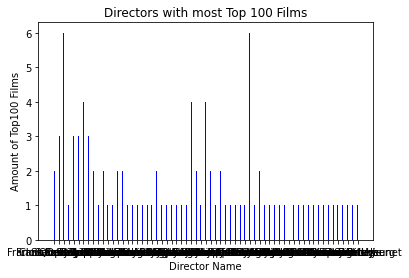

In [82]:
# visualization of No. of Movies in top 100 per director
director_top100= {}
for i in directors_list:
    director_top100[i]= directors_list.count(i)

#print(director_top100)

keys = director_top100.keys()
values = director_top100.values()
df_directors = pd.DataFrame(values, index= keys)
#df_directors

import matplotlib.pyplot as plt
plt.bar(x = keys, height= values, width=0.2, color='blue')
plt.xlabel('Director Name')
plt.ylabel('Amount of Top100 Films')
plt.title('Directors with most Top 100 Films')

Text(0.5, 1.0, 'Stars in most Top 100 Films')

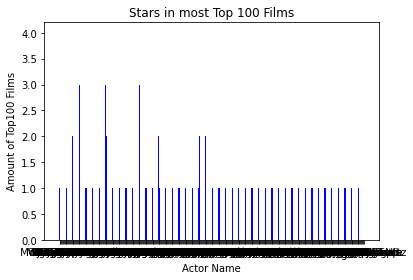

In [91]:
# visualization of No. of Movies in top 100 per Actor

all_actors = []
for i in all_stars:
    actor= i.split(',')
    for i  in actor:
        all_actors.append(i)
#print(all_actors)

actor_top100= {}
for i in all_actors:
    actor_top100[i]= all_actors.count(i)
#print(actor_top100)

keys = actor_top100.keys()
values = actor_top100.values()

df_actors = pd.DataFrame(values, index=keys)
#df_actors

plt.bar(x = keys, height= values, width=0.2, color='blue')
plt.xlabel('Actor Name')
plt.ylabel('Amount of Top100 Films')
plt.title('Stars in most Top 100 Films')

Text(0.5, 1.0, 'Film ratings by release year')

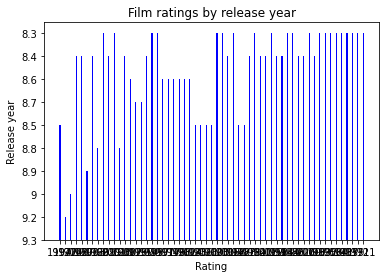

In [97]:
df_rating_releaseyear = pd.DataFrame(rating, release_list)
#df_rating_releaseyear

plt.bar(x = release_list, height= rating, width=0.2, color='blue')
plt.xlabel('Rating')
plt.ylabel('Release year')
plt.title('Film ratings by release year')